VALIDAÇÃO DO GRAFO
✓ Grafo validado com sucesso!
Ordenação topológica: S1 → S2 → S7 → H10 → H12 → S3 → S8 → S5 → S4 → S9 → S6 → H11

DESAFIO 1: CAMINHO DE VALOR MÁXIMO
Executando solução determinística...
⚠ Nenhuma solução viável — aumente T_MAX/C_MAX.

Executando Monte Carlo (1000 sim)...
✓ E[Valor]=-1.00 | σ=0.00 | IC95%=[-1.00, -1.00] | 5.9902s

DESAFIO 2: VERIFICAÇÃO CRÍTICA
Calculando custos...
✓ 120 permutações em 0.0006s
Top 3 (menor custo):
  1. S3 → S5 → S7 → S8 → S9 | Custo: 550h
  2. S3 → S5 → S8 → S7 → S9 | Custo: 550h
  3. S3 → S7 → S5 → S8 → S9 | Custo: 550h
Bottom 3 (maior custo):
  1. S9 → S8 → S5 → S7 → S3 | Custo: 710h
  2. S9 → S8 → S7 → S3 → S5 | Custo: 710h
  3. S9 → S8 → S7 → S5 → S3 | Custo: 710h
Médio Top3=550.0h | Médio Geral=630.0h | Δ=160h

DESAFIO 3: PIVÔ MAIS RÁPIDO
Habilidades básicas e V/T:
  S1: Programação Básica (Python) | V/T=0.037
  S2: Modelagem de Dados (SQL) | V/T=0.067
  S7: Estruturas em Nuvem | V/T=0.071
  H10: Segurança de Dados | V/T=0.083
  

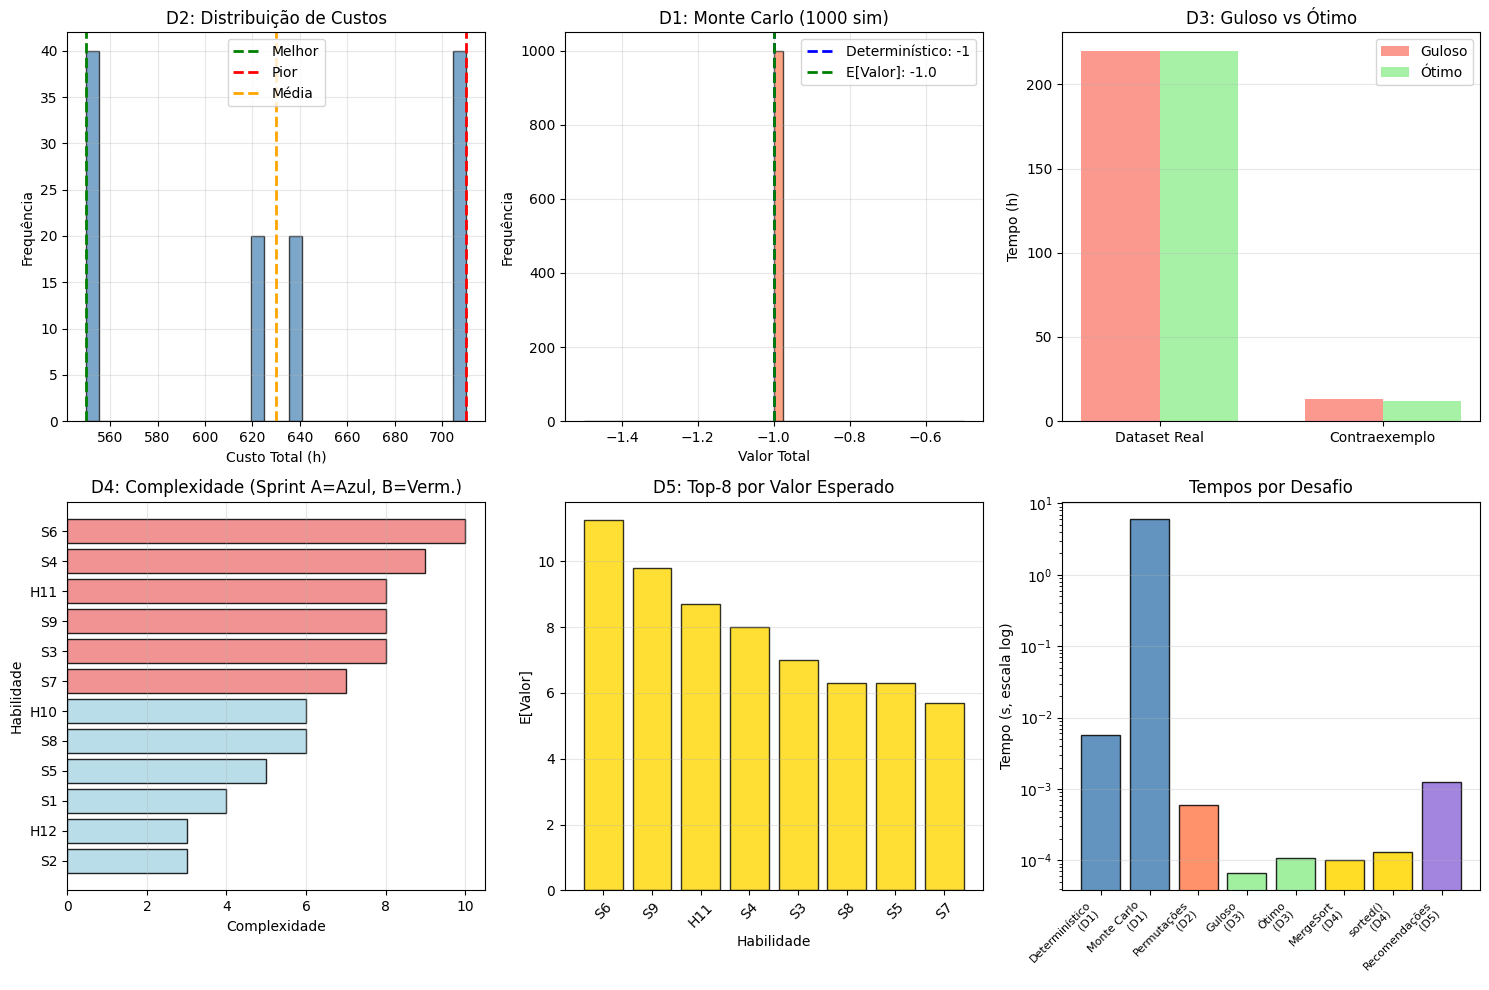

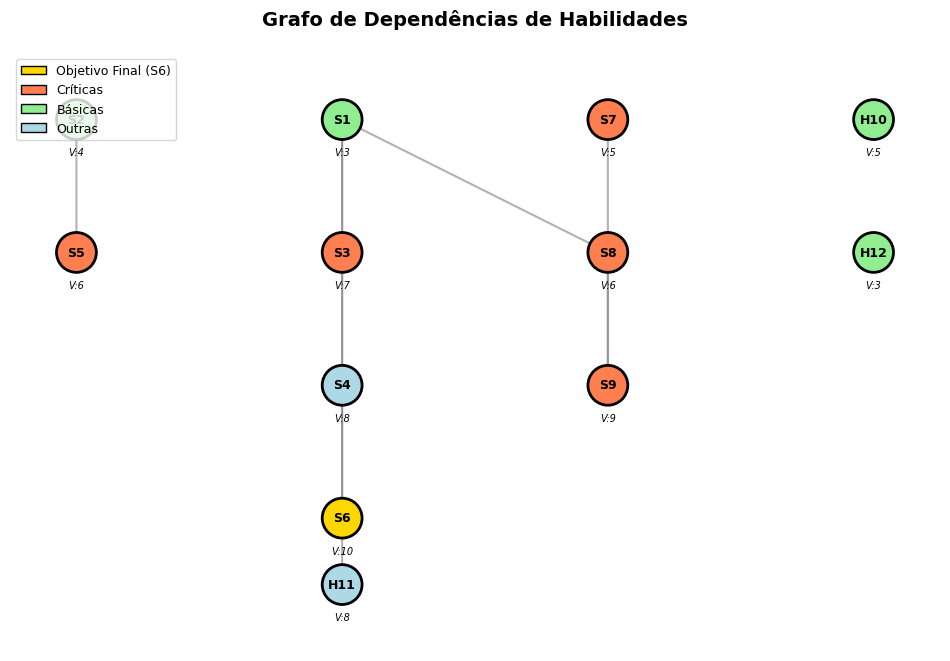

In [4]:
"""
Global Solution - Engenharia de Software (Dynamic Programming)
Motor de Orientação de Habilidades (MOH)

Equipe OptiMind:
- Luan Ramos (RM558537)
- Matheus Bortolotto (RM555189)
- Matheus Ricciotti (RM556930)

Ambiente: Python 3.10+
Versão: 2.2 (Completo e Corrigido)
"""

import itertools
import random
import statistics
import time
import math
from collections import deque
from functools import lru_cache
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# ============================================================================ #
# 0) DADOS
# ============================================================================ #

DADOS = {
    "S1":  {"nome": "Programação Básica (Python)", "tempo": 80,  "valor": 3,  "complexidade": 4, "pre_reqs": []},
    "S2":  {"nome": "Modelagem de Dados (SQL)",     "tempo": 60,  "valor": 4,  "complexidade": 3, "pre_reqs": []},
    "S3":  {"nome": "Algoritmos Avançados",         "tempo": 100, "valor": 7,  "complexidade": 8, "pre_reqs": ["S1"]},
    "S4":  {"nome": "Fund. Machine Learning",       "tempo": 120, "valor": 8,  "complexidade": 9, "pre_reqs": ["S1","S3"]},
    "S5":  {"nome": "Visualização de Dados (BI)",   "tempo": 40,  "valor": 6,  "complexidade": 5, "pre_reqs": ["S2"]},
    "S6":  {"nome": "IA Generativa Ética",          "tempo": 150, "valor": 10, "complexidade": 10,"pre_reqs": ["S4"]},
    "S7":  {"nome": "Estruturas em Nuvem",          "tempo": 70,  "valor": 5,  "complexidade": 7, "pre_reqs": []},
    "S8":  {"nome": "APIs e Microsserviços",        "tempo": 90,  "valor": 6,  "complexidade": 6, "pre_reqs": ["S1"]},
    "S9":  {"nome": "DevOps & CI/CD",               "tempo": 110, "valor": 9,  "complexidade": 8, "pre_reqs": ["S7","S8"]},
    "H10": {"nome": "Segurança de Dados",           "tempo": 60,  "valor": 5,  "complexidade": 6, "pre_reqs": []},
    "H11": {"nome": "Análise de Big Data",          "tempo": 90,  "valor": 8,  "complexidade": 8, "pre_reqs": ["S4"]},
    "H12": {"nome": "Introdução a IoT",             "tempo": 30,  "valor": 3,  "complexidade": 3, "pre_reqs": []}
}
CRITICAS = ["S3", "S5", "S7", "S8", "S9"]
OBJETIVO_FINAL = "S6"
T_MAX, C_MAX = 350, 30

# ============================================================================ #
# 1) VALIDAÇÃO DO GRAFO
# ============================================================================ #

def construir_grafo(dados):
    return {k: list(v["pre_reqs"]) for k, v in dados.items()}

def verificar_orfaos(grafo, dados):
    todas = set(dados.keys())
    usados = {p for reqs in grafo.values() for p in reqs}
    return usados - todas

def detectar_ciclo(grafo):
    vis, pilha = set(), set()
    def dfs(u):
        if u in pilha: return True
        if u in vis: return False
        vis.add(u); pilha.add(u)
        for v in grafo.get(u, []):
            if dfs(v): return True
        pilha.remove(u)
        return False
    return any(dfs(no) for no in grafo)

def topological_sort(dados):
    req = construir_grafo(dados)
    indeg = {k: 0 for k in req}
    for k, rs in req.items():
        for r in rs:
            indeg[k] += 1
    q = deque([k for k, d in indeg.items() if d == 0])
    order = []
    while q:
        u = q.popleft()
        order.append(u)
        for v, rs in req.items():
            if u in rs:
                indeg[v] -= 1
                if indeg[v] == 0:
                    q.append(v)
    if len(order) != len(req):
        raise ValueError("Ciclo detectado no grafo!")
    return order

print("="*70)
print("VALIDAÇÃO DO GRAFO")
print("="*70)
grafo = construir_grafo(DADOS)
orf = verificar_orfaos(grafo, DADOS)
if orf: raise ValueError(f"Pré-requisitos inexistentes: {orf}")
if detectar_ciclo(grafo): raise ValueError("Ciclo detectado no grafo!")
ORD_TOPO = topological_sort(DADOS)
print("✓ Grafo validado com sucesso!")
print("Ordenação topológica:", " → ".join(ORD_TOPO))
print()

# ============================================================================ #
# 2) PREPARAÇÃO PARA DP
# ============================================================================ #

IDS = list(DADOS.keys())
IDX = {k: i for i, k in enumerate(IDS)}
tempo = [DADOS[k]["tempo"] for k in IDS]
valor = [DADOS[k]["valor"] for k in IDS]
comp  = [DADOS[k]["complexidade"] for k in IDS]

def get_all_prereqs(skill_id):
    visited, stack = set(), [skill_id]
    while stack:
        current = stack.pop()
        if current in visited: continue
        visited.add(current)
        for prereq in DADOS[current]["pre_reqs"]:
            if prereq not in visited:
                stack.append(prereq)
    visited.discard(skill_id)
    return visited

OBJ = IDX[OBJETIVO_FINAL]
OBJ_WITH_PREREQS = {OBJETIVO_FINAL} | get_all_prereqs(OBJETIVO_FINAL)

# ============================================================================ #
# 3) DESAFIO 1 — DP por Subconjuntos (Knapsack 2D + Pré-reqs)
# ============================================================================ #

print("="*70)
print("DESAFIO 1: CAMINHO DE VALOR MÁXIMO")
print("="*70)

def subset_feasible(mask, T_lim=T_MAX, C_lim=C_MAX, must_include=None):
    skills_in_mask = {i for i in range(len(IDS)) if (mask >> i) & 1}
    # fechamento de pré-reqs
    for i in skills_in_mask:
        for pr in DADOS[IDS[i]]["pre_reqs"]:
            if IDX[pr] not in skills_in_mask:
                return False, (0,0,0)
    t = sum(tempo[i] for i in skills_in_mask)
    c = sum(comp[i]  for i in skills_in_mask)
    v = sum(valor[i] for i in skills_in_mask)
    if must_include is not None and must_include not in skills_in_mask:
        return False, (0,0,0)
    if t <= T_lim and c <= C_lim:
        return True, (t,c,v)
    return False, (t,c,v)

def best_deterministic_set():
    best = (-1, 0, 0, 0)  # (v, mask, t, c)
    n = len(IDS)
    for mask in range(1 << n):
        feas, (t, c, v) = subset_feasible(mask, must_include=OBJ)
        if feas and v > best[0]:
            best = (v, mask, t, c)
    return best

def monte_carlo_best(n_sims=1000, seed=42):
    rng = random.Random(seed)
    n = len(IDS)
    best_vals, best_masks = [], []
    for _ in range(n_sims):
        v_rand = [rng.uniform(0.9*valor[i], 1.1*valor[i]) for i in range(n)]
        best_v, best_m = -1, 0
        for mask in range(1 << n):
            feas, _ = subset_feasible(mask, must_include=OBJ)
            if not feas: continue
            vv = sum(v_rand[j] for j in range(n) if (mask >> j) & 1)
            if vv > best_v:
                best_v, best_m = vv, mask
        best_vals.append(best_v)
        best_masks.append(best_m)
    return statistics.mean(best_vals), statistics.stdev(best_vals), best_masks

def reconstruct_order(mask):
    subset = {IDS[i] for i in range(len(IDS)) if (mask >> i) & 1}
    indeg = {k: 0 for k in subset}
    adj   = {k: [] for k in subset}
    for k in subset:
        for p in DADOS[k]["pre_reqs"]:
            if p in subset:
                indeg[k] += 1
                adj[p].append(k)
    q = deque([k for k, d in indeg.items() if d == 0])
    order = []
    while q:
        u = q.popleft(); order.append(u)
        for v in adj[u]:
            indeg[v] -= 1
            if indeg[v] == 0: q.append(v)
    return order

print("Executando solução determinística...")
t0 = time.time()
best_v, best_mask, best_t, best_c = best_deterministic_set()
t_det = time.time() - t0
if best_v == -1:
    print("⚠ Nenhuma solução viável — aumente T_MAX/C_MAX.")
else:
    print(f"✓ Valor={best_v} | Tempo={best_t}h | Complexidade={best_c} | {t_det:.4f}s")
    caminho = reconstruct_order(best_mask)
    print("Sequência (ordem topológica no subconjunto):")
    for i, s in enumerate(caminho, 1):
        info = DADOS[s]
        print(f"  {i}. {s} - {info['nome']} (T:{info['tempo']}h, V:{info['valor']}, C:{info['complexidade']})")

print("\nExecutando Monte Carlo (1000 sim)...")
t0 = time.time()
mc_mean, mc_std, mc_masks = monte_carlo_best(1000)
t_mc = time.time() - t0
print(f"✓ E[Valor]={mc_mean:.2f} | σ={mc_std:.2f} | IC95%=[{mc_mean-1.96*mc_std:.2f}, {mc_mean+1.96*mc_std:.2f}] | {t_mc:.4f}s")
print()

# ============================================================================ #
# 4) DESAFIO 2 — Permutações das Críticas (CORRIGIDO)
# ============================================================================ #

print("="*70)
print("DESAFIO 2: VERIFICAÇÃO CRÍTICA")
print("="*70)

def custo_permutacao(perm):
    custo, aprendidas = 0, set()
    for s in perm:
        faltando = [p for p in DADOS[s]["pre_reqs"] if p not in aprendidas]
        espera = sum(DADOS[p]["tempo"] for p in faltando)
        custo += espera + DADOS[s]["tempo"]
        aprendidas.update(faltando); aprendidas.add(s)
    return custo

print("Calculando custos...")
t0 = time.time()
perms  = list(itertools.permutations(CRITICAS))
custos = [(p, custo_permutacao(p)) for p in perms]
custos.sort(key=lambda x: x[1])
t_perm = time.time() - t0

top3, bottom3 = custos[:3], custos[-3:]
media_top3  = sum(item[1] for item in top3) / 3
media_geral = sum(item[1] for item in custos) / len(custos)

print(f"✓ {len(perms)} permutações em {t_perm:.4f}s")
print("Top 3 (menor custo):")
for i, item in enumerate(top3, 1):
    p, c = item[:2]
    print(f"  {i}. {' → '.join(p)} | Custo: {c}h")
print("Bottom 3 (maior custo):")
for i, item in enumerate(bottom3, 1):
    p, c = item[:2]
    print(f"  {i}. {' → '.join(p)} | Custo: {c}h")
print(f"Médio Top3={media_top3:.1f}h | Médio Geral={media_geral:.1f}h | Δ={custos[-1][1]-custos[0][1]}h\n")

# ============================================================================ #
# 5) DESAFIO 3 — Guloso (V/T) x Ótimo (força bruta)
# ============================================================================ #

print("="*70)
print("DESAFIO 3: PIVÔ MAIS RÁPIDO")
print("="*70)

BASICAS = {k: v for k, v in DADOS.items() if not v["pre_reqs"]}
ALVO_ADAPT = 15

def greedy_vt_alvo(basicas, alvo=ALVO_ADAPT):
    ordem = sorted(basicas.items(), key=lambda kv: kv[1]["valor"]/kv[1]["tempo"], reverse=True)
    t = v = 0; pick = []
    for k, info in ordem:
        if v >= alvo: break
        pick.append(k); t += info["tempo"]; v += info["valor"]
    return t, v, pick

def otimo_min_tempo(basicas, alvo=ALVO_ADAPT):
    keys = list(basicas.keys()); best = (math.inf, 0, [])
    n = len(keys)
    for r in range(1, n+1):
        for comb in itertools.combinations(keys, r):
            v = sum(basicas[k]["valor"] for k in comb)
            if v >= alvo:
                t = sum(basicas[k]["tempo"] for k in comb)
                if t < best[0]: best = (t, v, list(comb))
    return best

print("Habilidades básicas e V/T:")
for k, v in BASICAS.items():
    print(f"  {k}: {v['nome']} | V/T={v['valor']/v['tempo']:.3f}")

t0 = time.time()
t_g, v_g, esc_g = greedy_vt_alvo(BASICAS)
t_guloso = time.time() - t0
print(f"\nGuloso: Tempo={t_g}h | Valor={v_g} | Pick={esc_g} | {t_guloso:.6f}s")

t0 = time.time()
t_o, v_o, esc_o = otimo_min_tempo(BASICAS)
t_otimo = time.time() - t0
print(f"Ótimo:  Tempo={t_o}h | Valor={v_o} | Pick={esc_o} | {t_otimo:.6f}s")

if t_g == t_o: print("✓ Guloso encontrou o ótimo!\n")
else:         print(f"⚠ Diferença de tempo: {t_g - t_o}h\n")

# Contraexemplo
SYN = {"A":{"tempo":7,"valor":7.9}, "B":{"tempo":6,"valor":6.1}, "C":{"tempo":6,"valor":6.1}}
def greedy_syn(alvo=12):
    ordem = sorted(SYN.items(), key=lambda kv: kv[1]["valor"]/kv[1]["tempo"], reverse=True)
    t = v = 0; pick=[]
    for k, info in ordem:
        if v >= alvo: break
        pick.append(k); t += info["tempo"]; v += info["valor"]
    return t, v, pick
def otimo_syn(alvo=12):
    keys = list(SYN.keys()); best=(math.inf,0,[])
    for r in range(1, len(keys)+1):
        for comb in itertools.combinations(keys, r):
            v = sum(SYN[k]["valor"] for k in comb)
            if v >= alvo:
                t = sum(SYN[k]["tempo"] for k in comb)
                if t < best[0]: best=(t,v,list(comb))
    return best

tg_syn, vg_syn, pg_syn = greedy_syn(12)
to_syn, vo_syn, po_syn = otimo_syn(12)
print("Contraexemplo (A:7/7.9, B:6/6.1, C:6/6.1), alvo=12")
print(f"  Guloso: tempo={tg_syn}h, valor={vg_syn:.1f}, pick={pg_syn}")
print(f"  Ótimo:  tempo={to_syn}h, valor={vo_syn:.1f}, pick={po_syn}")
print(f"  Diferença: {tg_syn - to_syn}h\n")

# ============================================================================ #
# 6) DESAFIO 4 — Merge Sort x sorted()
# ============================================================================ #

print("="*70)
print("DESAFIO 4: TRILHAS PARALELAS (ORDENAÇÃO)")
print("="*70)

def merge_sort_pairs(arr):
    if len(arr) <= 1: return arr
    mid = len(arr)//2
    left = merge_sort_pairs(arr[:mid])
    right= merge_sort_pairs(arr[mid:])
    return merge_pairs(left, right)

def merge_pairs(L, R):
    i = j = 0; out=[]
    while i < len(L) and j < len(R):
        if L[i][1]["complexidade"] <= R[j][1]["complexidade"]:
            out.append(L[i]); i += 1
        else:
            out.append(R[j]); j += 1
    out.extend(L[i:]); out.extend(R[j:]); return out

items = list(DADOS.items())
t0 = time.time(); ms_result = merge_sort_pairs(items); t_merge = time.time() - t0
t0 = time.time(); py_result = sorted(items, key=lambda kv: kv[1]["complexidade"]); t_py = time.time() - t0

sprintA = [k for k, _ in ms_result[:6]]
sprintB = [k for k, _ in ms_result[6:]]
print(f"MergeSort={t_merge:.6f}s | sorted()={t_py:.6f}s | fator={(t_merge/t_py):.2f}x")
print("Ordem por complexidade:")
for i, (k, v) in enumerate(ms_result, 1):
    print(f"  {i:2d}. {k} - {v['nome']} (C={v['complexidade']})")
print(f"Sprint A: {', '.join(sprintA)}")
print(f"Sprint B: {', '.join(sprintB)}\n")

# ============================================================================ #
# 7) DESAFIO 5 — Recomendações (DP com horizonte)
# ============================================================================ #

print("="*70)
print("DESAFIO 5: RECOMENDAÇÃO DE HABILIDADES")
print("="*70)

SCENARIOS = [
    ("Cloud Boom",           0.35, {"S7":1.4, "S8":1.15, "S9":1.25}),
    ("AI Ethics Regulation", 0.25, {"S6":1.5, "H10":1.2}),
    ("Data Analytics Surge", 0.25, {"S5":1.2, "H11":1.35}),
    ("Baseline",             0.15, {})
]
GAMMA, YEARS = 0.9, 5

def expected_value(skill_id):
    base = DADOS[skill_id]["valor"]
    return sum(prob * base * m.get(skill_id, 1.0) for _, prob, m in SCENARIOS)

EV = {k: expected_value(k) for k in DADOS}

print("Top 5 E[Valor]:")
for s in sorted(EV, key=EV.get, reverse=True)[:5]:
    print(f"  {s}: E[V]={EV[s]:.2f} (base={DADOS[s]['valor']})")

def available_skills(mask):
    out=[]
    for i, k in enumerate(IDS):
        if (mask >> i) & 1: continue
        if all(((mask >> IDX[pr]) & 1) for pr in DADOS[k]["pre_reqs"]):
            out.append(i)
    return out

@lru_cache(maxsize=None)
def dp_rec(year, mask):
    if year == YEARS: return 0.0
    best = dp_rec(year+1, mask)  # skip
    for i in available_skills(mask):
        reward = EV[IDS[i]]
        future = GAMMA * dp_rec(year+1, mask | (1 << i))
        best = max(best, reward + future)
    return best

def recommend_next(mask=0, k=3):
    cand=[]
    for i in available_skills(mask):
        q = EV[IDS[i]] + GAMMA * dp_rec(1, mask | (1 << i))
        t = DADOS[IDS[i]]["tempo"]
        cand.append((IDS[i], q, t, q/t))
    cand.sort(key=lambda x: x[3], reverse=True)
    return cand[:k]

t0 = time.time()
recs = recommend_next(0, 3)
t_rec = time.time() - t0
print(f"\nTop 3 Recomendações (E[V]/h) | {t_rec:.4f}s:")
for i, (s, ev_total, t, evph) in enumerate(recs, 1):
    print(f"  {i}. {s} - {DADOS[s]['nome']} | EV≈{ev_total:.2f} | T={t}h | EV/h={evph:.3f}")
print()

# ============================================================================ #
# 8) VISUALIZAÇÕES (6 gráficos)
# ============================================================================ #

print("="*70)
print("GERANDO VISUALIZAÇÕES")
print("="*70)

plt.figure(figsize=(15, 10))

# (1) Distribuição de custos (D2)
plt.subplot(2,3,1)
custos_valores = [c for _, c in custos]
plt.hist(custos_valores, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(custos_valores[0],  color='green', linestyle='--', linewidth=2, label='Melhor')
plt.axvline(custos_valores[-1], color='red',   linestyle='--', linewidth=2, label='Pior')
plt.axvline(sum(custos_valores)/len(custos_valores), color='orange', linestyle='--', linewidth=2, label='Média')
plt.xlabel('Custo Total (h)'); plt.ylabel('Frequência'); plt.title('D2: Distribuição de Custos')
plt.legend(); plt.grid(True, alpha=0.3)

# (2) Monte Carlo (D1)
plt.subplot(2,3,2)
mc_values=[]
rng = random.Random(42); n=len(IDS)
for _ in range(1000):
    v_rand=[rng.uniform(0.9*valor[i],1.1*valor[i]) for i in range(n)]
    best_sim=-1
    for mask in range(1<<n):
        feas,_=subset_feasible(mask, must_include=OBJ)
        if not feas: continue
        vv=sum(v_rand[j] for j in range(n) if (mask>>j)&1)
        if vv>best_sim: best_sim=vv
    mc_values.append(best_sim)
plt.hist(mc_values, bins=40, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(best_v,  color='blue',  linestyle='--', linewidth=2, label=f'Determinístico: {best_v}')
plt.axvline(mc_mean, color='green', linestyle='--', linewidth=2, label=f'E[Valor]: {mc_mean:.1f}')
plt.xlabel('Valor Total'); plt.ylabel('Frequência'); plt.title('D1: Monte Carlo (1000 sim)')
plt.legend(); plt.grid(True, alpha=0.3)

# (3) Guloso vs Ótimo (D3)
plt.subplot(2,3,3)
categorias=['Dataset Real','Contraexemplo']; x=np.arange(len(categorias)); width=0.35
guloso_tempos=[t_g, tg_syn]; otimo_tempos=[t_o, to_syn]
plt.bar(x-width/2, guloso_tempos, width, label='Guloso', color='salmon', alpha=0.8)
plt.bar(x+width/2, otimo_tempos,  width, label='Ótimo',  color='lightgreen', alpha=0.8)
plt.xticks(x, categorias); plt.ylabel('Tempo (h)'); plt.title('D3: Guloso vs Ótimo')
plt.legend(); plt.grid(True, alpha=0.3, axis='y')

# (4) Complexidade por habilidade (D4)
plt.subplot(2,3,4)
skills=[k for k,_ in ms_result]; complexidades=[v['complexidade'] for _,v in ms_result]
cores=['lightblue' if k in sprintA else 'lightcoral' for k in skills]
plt.barh(skills, complexidades, color=cores, edgecolor='black', alpha=0.85)
plt.xlabel('Complexidade'); plt.ylabel('Habilidade'); plt.title('D4: Complexidade (Sprint A=Azul, B=Verm.)')
plt.grid(True, alpha=0.3, axis='x')

# (5) E[Valor] por habilidade (D5)
plt.subplot(2,3,5)
ev_sorted=sorted(EV.items(), key=lambda x: x[1], reverse=True)[:8]
skills_ev=[k for k,_ in ev_sorted]; valores_ev=[v for _,v in ev_sorted]
plt.bar(skills_ev, valores_ev, color='gold', edgecolor='black', alpha=0.8)
plt.xlabel('Habilidade'); plt.ylabel('E[Valor]'); plt.title('D5: Top-8 por Valor Esperado')
plt.xticks(rotation=45); plt.grid(True, alpha=0.3, axis='y')

# (6) Tempo de execução (log)
plt.subplot(2,3,6)
algoritmos=['Determinístico\n(D1)','Monte Carlo\n(D1)','Permutações\n(D2)','Guloso\n(D3)','Ótimo\n(D3)','MergeSort\n(D4)','sorted()\n(D4)','Recomendações\n(D5)']
tempos=[t_det, t_mc, t_perm, t_guloso, t_otimo, t_merge, t_py, t_rec]
plt.bar(algoritmos, tempos, color=['steelblue','steelblue','coral','lightgreen','lightgreen','gold','gold','mediumpurple'], edgecolor='black', alpha=0.85)
plt.yscale('log'); plt.ylabel('Tempo (s, escala log)'); plt.title('Tempos por Desafio')
plt.xticks(rotation=45, ha='right', fontsize=8); plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('resultados_visualizacoes.png', dpi=300, bbox_inches='tight')
print("✓ Gráficos salvos em 'resultados_visualizacoes.png'\n")

# ============================================================================ #
# 9) Grafo de dependências (desenho simples)
# ============================================================================ #

print("Gerando grafo de dependências...")
plt.figure(figsize=(12,8)); ax=plt.subplot(111)
pos={'S1':(2,4),'S2':(0,4),'S3':(2,3),'S4':(2,2),'S5':(0,3),'S6':(2,1),'S7':(4,4),'S8':(4,3),'S9':(4,2),'H10':(6,4),'H11':(2,0.5),'H12':(6,3)}
for skill, info in DADOS.items():
    x1,y1=pos[skill]
    for prereq in info['pre_reqs']:
        x0,y0=pos[prereq]
        ax.annotate('', xy=(x1,y1), xytext=(x0,y0), arrowprops=dict(arrowstyle='->', lw=1.5, color='gray', alpha=0.6))
for skill,(x,y) in pos.items():
    info=DADOS[skill]
    if skill==OBJETIVO_FINAL: color,size='gold',2500
    elif skill in CRITICAS:   color,size='coral',2000
    elif not info['pre_reqs']:color,size='lightgreen',1800
    else:                     color,size='lightblue',1800
    circle=plt.Circle((x,y),0.15,color=color,ec='black',linewidth=2,zorder=3); ax.add_patch(circle)
    ax.text(x,y,skill,ha='center',va='center',fontsize=9,fontweight='bold',zorder=4)
    ax.text(x,y-0.25,f"V:{info['valor']}",ha='center',va='center',fontsize=7,style='italic',zorder=4)
ax.set_xlim(-0.5,6.5); ax.set_ylim(0,4.5); ax.set_aspect('equal'); ax.axis('off')
legend_e=[Patch(facecolor='gold',edgecolor='black',label='Objetivo Final (S6)'),
          Patch(facecolor='coral',edgecolor='black',label='Críticas'),
          Patch(facecolor='lightgreen',edgecolor='black',label='Básicas'),
          Patch(facecolor='lightblue',edgecolor='black',label='Outras')]
ax.legend(handles=legend_e, loc='upper left', fontsize=9)
plt.title('Grafo de Dependências de Habilidades', fontsize=14, fontweight='bold', pad=20)
plt.savefig('grafo_dependencias.png', dpi=300, bbox_inches='tight')
print("✓ Grafo salvo em 'grafo_dependencias.png'\n")

# ============================================================================ #
# 10) Complexidades — resumo
# ============================================================================ #

print("="*70)
print("RESUMO DE COMPLEXIDADES ALGORÍTMICAS")
print("="*70)
complexidades=[("D1 - DP Valor Máximo", "O(2^n·n)",     "Exponencial", "Força bruta válida com checagens"),
               ("D1 - Monte Carlo",     "O(k·2^n·n)",   "Exponencial", "k=simulações"),
               ("D2 - Permutações",     "O(n!·n^2)",    "Fatorial",    "n=5 críticas"),
               ("D3 - Guloso",          "O(n log n)",   "Linearítmico","Ordenação + seleção"),
               ("D3 - Ótimo",           "O(2^n·n)",     "Exponencial", "Busca exaustiva"),
               ("D4 - Merge Sort",      "O(n log n)",   "Linearítmico","Todos os casos"),
               ("D5 - DP Horizonte",    "O(T·2^n·n)",   "Exponencial", "T=5 anos")]
print(f"{'Algoritmo':<28} {'Complexidade':<15} {'Classe':<12} Observações")
print("-"*70)
for alg, compx, classe, obs in complexidades:
    print(f"{alg:<28} {compx:<15} {classe:<12} {obs}")
print()

# ============================================================================ #
# 11) SALVANDO RESULTADOS (TXT) — com correções de desempacotamento
# ============================================================================ #

print("="*70)
print("SALVANDO RESULTADOS")
print("="*70)

with open('resultados_completos.txt','w',encoding='utf-8') as f:
    f.write("="*70+"\nGLOBAL SOLUTION - MOH\n"+ "="*70+"\n\n")
    f.write("EQUIPE OPTIMIND\nLuan Ramos (RM558537)\nMatheus Bortolotto (RM555189)\nMatheus Ricciotti (RM556930)\n\n")

    f.write("="*70+"\nDESAFIO 1: CAMINHO DE VALOR MÁXIMO\n"+ "="*70+"\n")
    if best_v == -1:
        f.write("ATENÇÃO: Nenhuma solução viável (T_MAX/C_MAX apertados)\n\n")
    else:
        f.write(f"Solução Determinística:\n  Valor Total: {best_v}\n  Tempo Total: {best_t}h\n  Complexidade Total: {best_c}\n  Tempo Exec: {t_det:.4f}s\n\n")
        f.write("Sequência de Aprendizado:\n")
        for i, s in enumerate(caminho, 1):
            info = DADOS[s]
            f.write(f"  {i}. {s} - {info['nome']} (T:{info['tempo']}h, V:{info['valor']}, C:{info['complexidade']})\n")
        f.write("\n")
    f.write(f"Monte Carlo (1000 sim): E[Valor]={mc_mean:.2f} | σ={mc_std:.2f} | IC95%=[{mc_mean-1.96*mc_std:.2f}, {mc_mean+1.96*mc_std:.2f}] | Tempo={t_mc:.4f}s\n\n")

    f.write("="*70+"\nDESAFIO 2: VERIFICAÇÃO CRÍTICA\n"+ "="*70+"\n")
    f.write(f"Análise de {len(perms)} permutações | Tempo={t_perm:.4f}s\n\n")
    f.write("Top 3 Ordens (menor custo):\n")
    for i, item in enumerate(top3, 1):
        p, c = item[:2]
        f.write(f"  {i}. {' → '.join(p)} | Custo: {c}h\n")
    f.write("\nBottom 3 Ordens (maior custo):\n")
    for i, item in enumerate(bottom3, 1):
        p, c = item[:2]
        f.write(f"  {i}. {' → '.join(p)} | Custo: {c}h\n")
    f.write(f"\nMédio Top3={media_top3:.1f}h | Médio Geral={media_geral:.1f}h | Δ={custos[-1][1]-custos[0][1]}h\n\n")

    f.write("="*70+"\nDESAFIO 3: PIVÔ MAIS RÁPIDO\n"+ "="*70+"\n")
    f.write(f"Guloso: Tempo={t_g}h, Valor={v_g}, Pick={esc_g} | Exec={t_guloso:.6f}s\n")
    f.write(f"Ótimo:  Tempo={t_o}h, Valor={v_o}, Pick={esc_o} | Exec={t_otimo:.6f}s\n")
    f.write(f"Contraex.: Guloso Tempo={tg_syn}h, Ótimo Tempo={to_syn}h, Δ={tg_syn-to_syn}h\n\n")

    f.write("="*70+"\nDESAFIO 4: TRILHAS PARALELAS\n"+ "="*70+"\n")
    f.write(f"MergeSort={t_merge:.6f}s | sorted()={t_py:.6f}s | fator={(t_merge/t_py):.2f}x\n")
    f.write(f"Sprint A: {', '.join(sprintA)}\nSprint B: {', '.join(sprintB)}\n\n")

    f.write("="*70+"\nDESAFIO 5: RECOMENDAÇÕES\n"+ "="*70+"\n")
    f.write(f"Tempo DP Recomendações: {t_rec:.4f}s\nTop 3 (E[V]/h):\n")
    for i, (s, ev_total, t, evph) in enumerate(recs, 1):
        f.write(f"  {i}. {s} - {DADOS[s]['nome']} | EV≈{ev_total:.2f} | T={t}h | EV/h={evph:.3f}\n")

print("✓ Resultados salvos em 'resultados_completos.txt'\n")

print("="*70)
print("EXECUÇÃO CONCLUÍDA COM SUCESSO!")
print("="*70)
print("Arquivos gerados:")
print("  ✓ resultados_completos.txt")
print("  ✓ resultados_visualizacoes.png")
print("  ✓ grafo_dependencias.png")
print()
# ============================================================================ #
# 12) GERANDO ARQUIVOS CSV DE RESULTADOS
# ============================================================================ #

import pandas as pd

print("="*70)
print("GERANDO CSVs DE RESULTADOS")
print("="*70)

# 1️⃣ CSV de métricas gerais
metricas_data = [
    ["Desafio 1 - DP Determinístico", t_det, "O(2^n·n)", best_v, best_t, best_c],
    ["Desafio 1 - Monte Carlo", t_mc, "O(k·2^n·n)", mc_mean, "-", "-"],
    ["Desafio 2 - Permutações", t_perm, "O(n!·n²)", media_top3, "-", "-"],
    ["Desafio 3 - Guloso", t_guloso, "O(n log n)", v_g, t_g, "-"],
    ["Desafio 3 - Ótimo", t_otimo, "O(2^n·n)", v_o, t_o, "-"],
    ["Desafio 4 - Merge Sort", t_merge, "O(n log n)", "-", "-", "-"],
    ["Desafio 5 - Recomendações", t_rec, "O(T·2^n·n)", "-", "-", "-"]
]
metricas_df = pd.DataFrame(metricas_data, columns=["Desafio", "Tempo (s)", "Complexidade", "Valor", "Tempo (h)", "Complexidade Total"])
metricas_df.to_csv("metricas_gerais.csv", index=False, encoding="utf-8-sig")
print("✓ Arquivo 'metricas_gerais.csv' salvo.")

# 2️⃣ CSV com as 3 melhores e 3 piores permutações (Desafio 2)
top_bottom_df = pd.DataFrame(
    [(f"Top {i+1}", " → ".join(item[0]), item[1]) for i, item in enumerate(top3)] +
    [(f"Bottom {i+1}", " → ".join(item[0]), item[1]) for i, item in enumerate(bottom3)],
    columns=["Ranking", "Permutação", "Custo (h)"]
)
top_bottom_df.to_csv("top3_permutacoes.csv", index=False, encoding="utf-8-sig")
print("✓ Arquivo 'top3_permutacoes.csv' salvo.")

# 3️⃣ CSV com as recomendações do Desafio 5
recs_df = pd.DataFrame([
    {
        "Rank": i+1,
        "Habilidade": s,
        "Nome": DADOS[s]["nome"],
        "E[Valor Total]": round(ev_total, 2),
        "Tempo (h)": t,
        "E[V]/h": round(evph, 3)
    }
    for i, (s, ev_total, t, evph) in enumerate(recs)
])
recs_df.to_csv("recomendacoes.csv", index=False, encoding="utf-8-sig")
print("✓ Arquivo 'recomendacoes.csv' salvo.")

# 4️⃣ CSV consolidado das habilidades (dataset base)
habilidades_df = pd.DataFrame([
    {"ID": k, "Nome": v["nome"], "Tempo (h)": v["tempo"], "Valor": v["valor"],
     "Complexidade": v["complexidade"], "Pré-Requisitos": ", ".join(v["pre_reqs"])}
    for k, v in DADOS.items()
])
habilidades_df.to_csv("habilidades_base.csv", index=False, encoding="utf-8-sig")
print("✓ Arquivo 'habilidades_base.csv' salvo.")

print("\n✓ Todos os CSVs gerados com sucesso!\n")
print("Arquivos criados:")
print("  - metricas_gerais.csv")
print("  - top3_permutacoes.csv")
print("  - recomendacoes.csv")
print("  - habilidades_base.csv")
print("="*70)
